In [1]:
%matplotlib inline

# Graph Convolutional Network Structure

The structure of Grah Convolutional Network (GCN) can be fine-tuned. It includes number of layers, layer sizes and other hyperparameters. Here we use the Nanostring CosMx data as an example to show how to fine-tune the hyperparameters of GCN structure.

### Import packages & data

In [2]:
import random
import numpy as np
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt 

import Bering as br

In [3]:
# load data
df_spots_all = br.datasets.cosmx_nsclc_he()
df_spots_seg = df_spots_all[df_spots_all['labels'] != 'background'] # foreground nodes
df_spots_unseg = df_spots_all[df_spots_all['labels'] == 'background'] # background nodes

### Train deep Graph network

In [4]:
# image-free segmentation
bg_dp = br.BrGraph(df_spots_seg, df_spots_unseg)
br.graphs.BuildWindowGraphs(bg_dp, n_cells_perClass = 15, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg_dp, batch_size = 16, training_ratio = 0.8)

In [5]:
node_gcnq_hidden_dims = [512, 256, 128, 128, 64, 32, 16] # GCN structure
node_mlp_hidden_dims = [16, 32, 32] # MLP as last layers before node clf

Training node classifier:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [02:07<00:02,  2.23s/it]

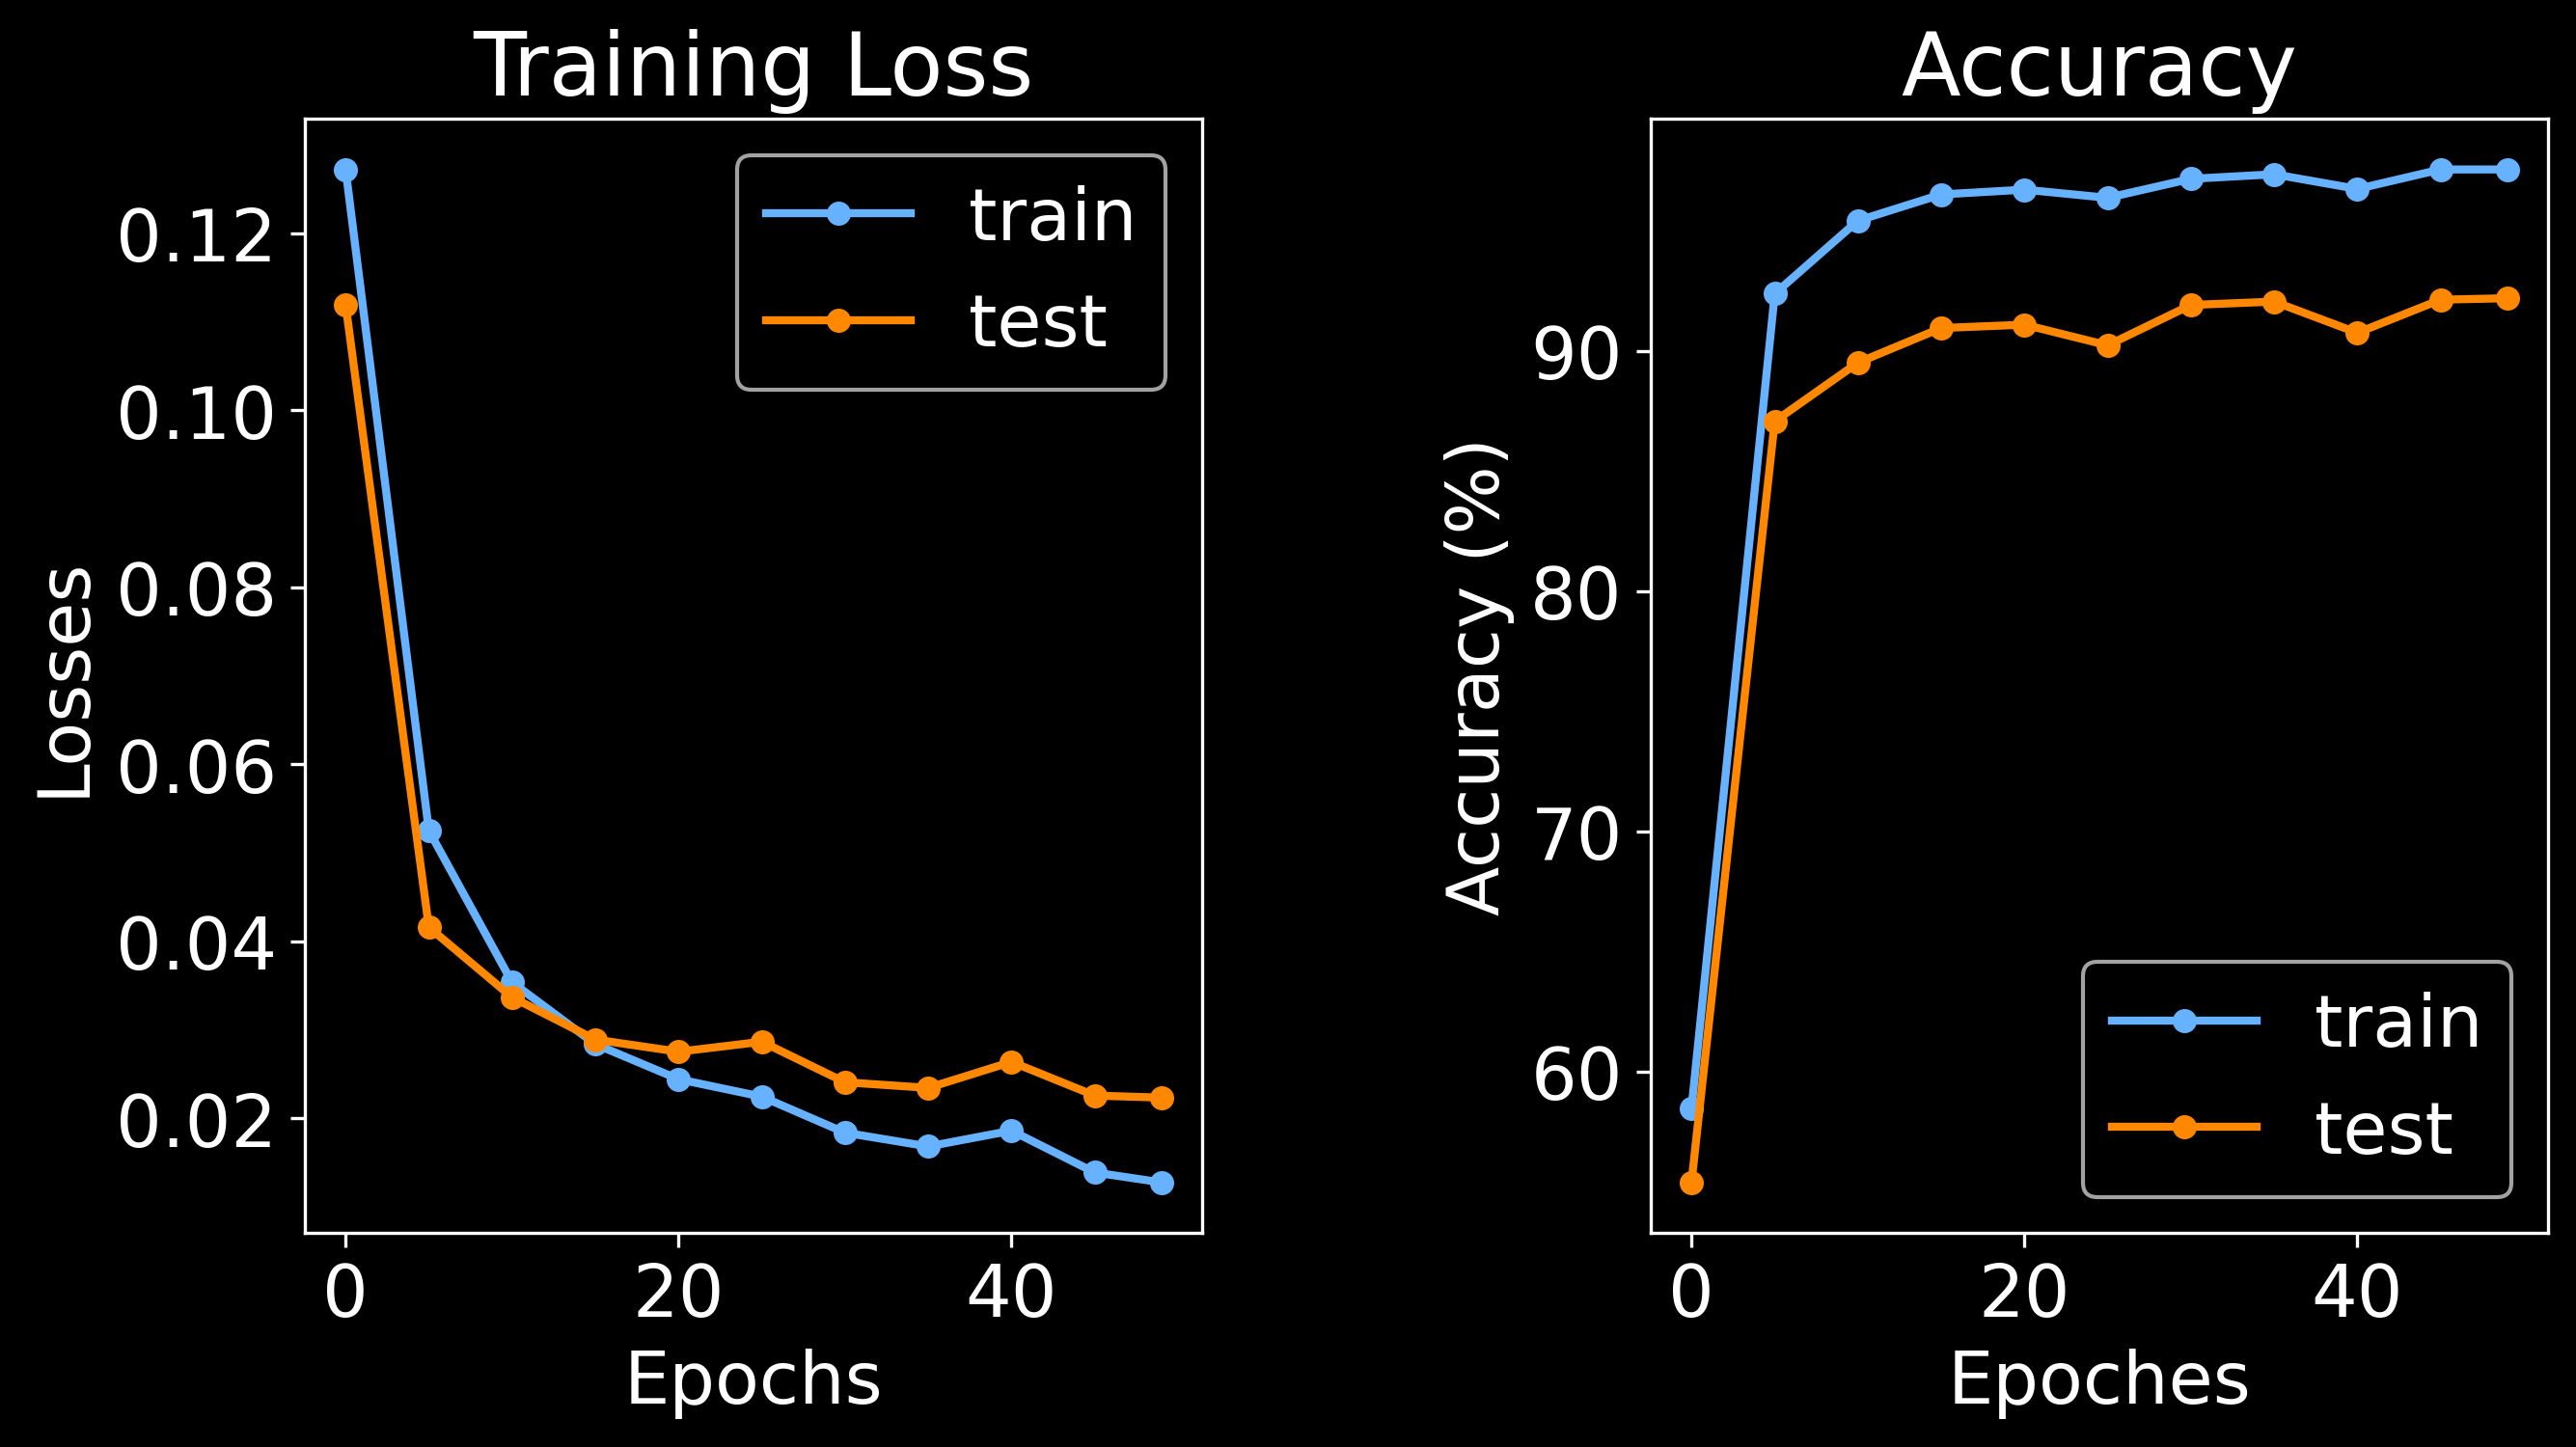

Training edge classifier:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [01:36<00:01,  1.81s/it]

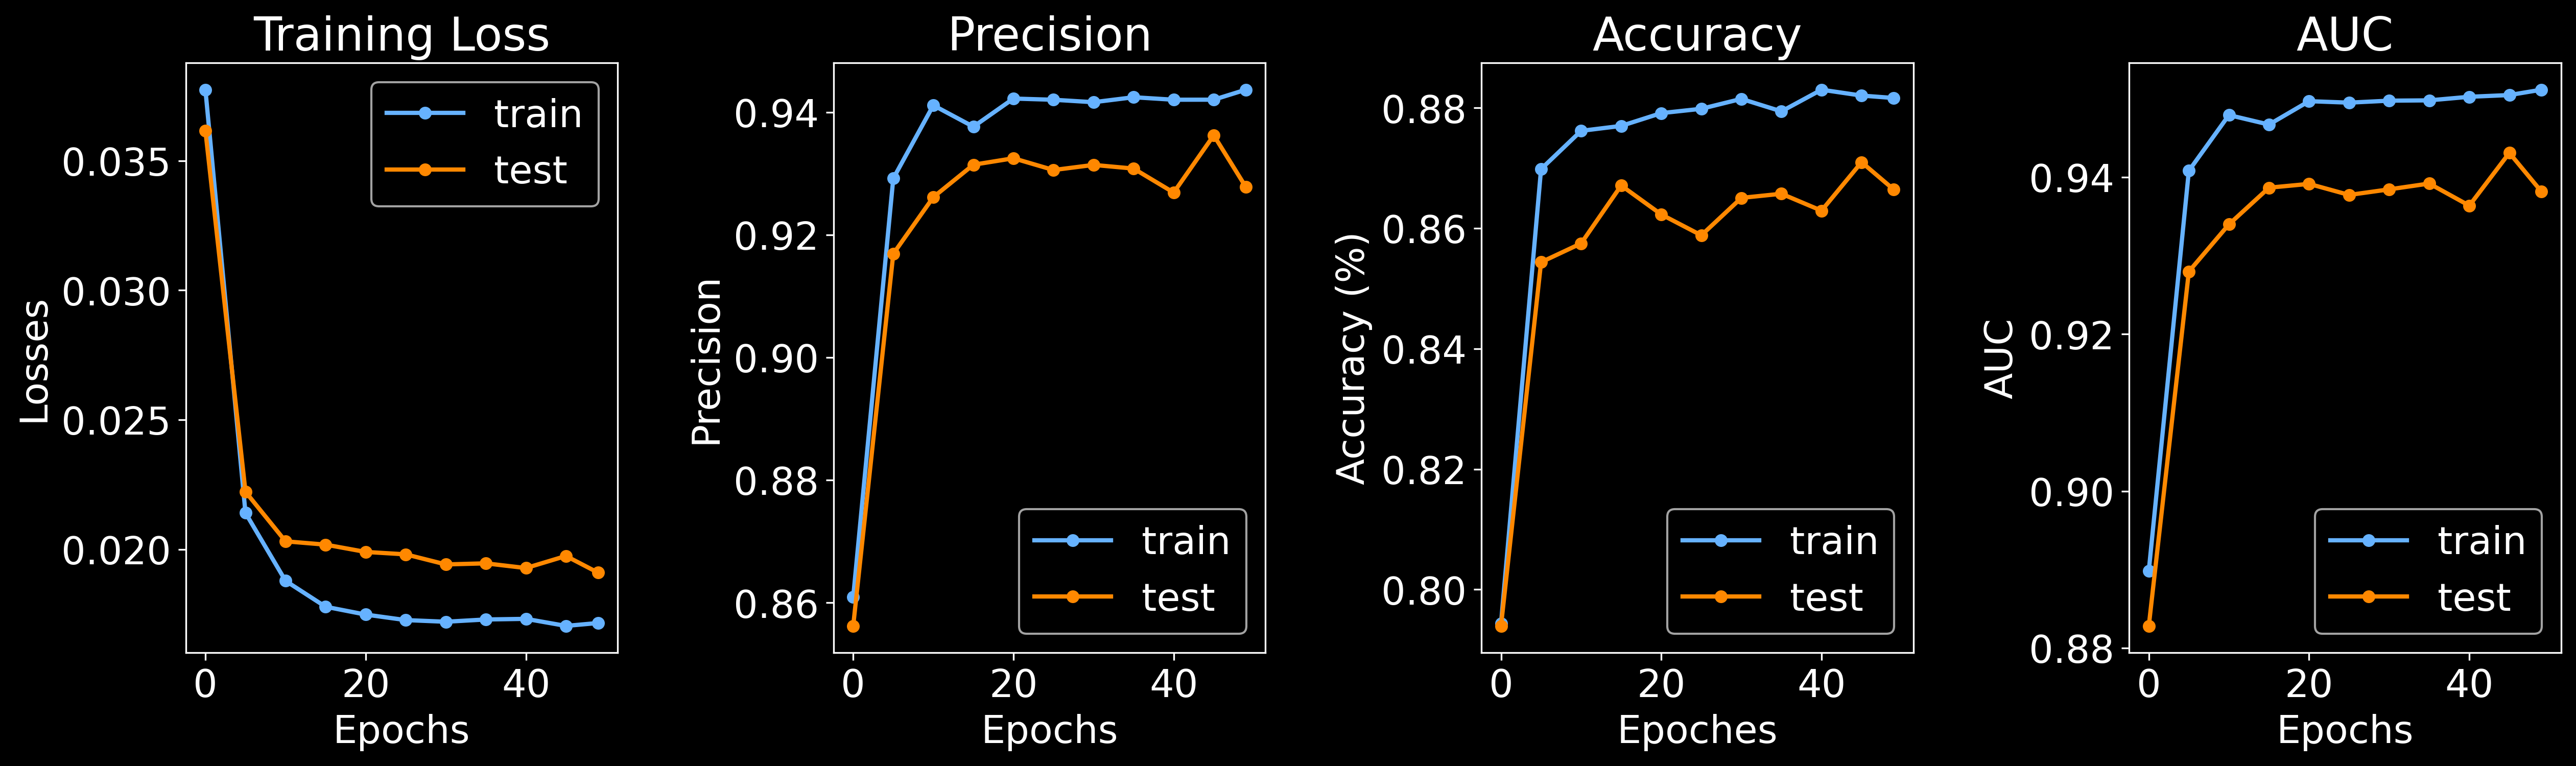

Training edge classifier: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:40<00:00,  2.02s/it]


In [6]:
br.train.Training(
    bg_dp,
    node_gcnq_hidden_dims = node_gcnq_hidden_dims,
    node_mlp_hidden_dims = node_mlp_hidden_dims,
    edge_rbf_start = 0,
    edge_rbf_stop = 128,
    edge_rbf_n_kernels = 64,
    node_epoches = 50, 
)

### Train shallow Graph network

In [7]:
# image-free segmentation
bg_sh = br.BrGraph(df_spots_seg, df_spots_unseg)
br.graphs.BuildWindowGraphs(bg_sh, n_cells_perClass = 15, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg_sh, batch_size = 16, training_ratio = 0.8)

In [8]:
node_gcnq_hidden_dims = [128, 16] # GCN structure
node_mlp_hidden_dims = [16, 32, 32] # MLP as last layers before node clf

Training node classifier:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [00:38<00:00,  1.64it/s]

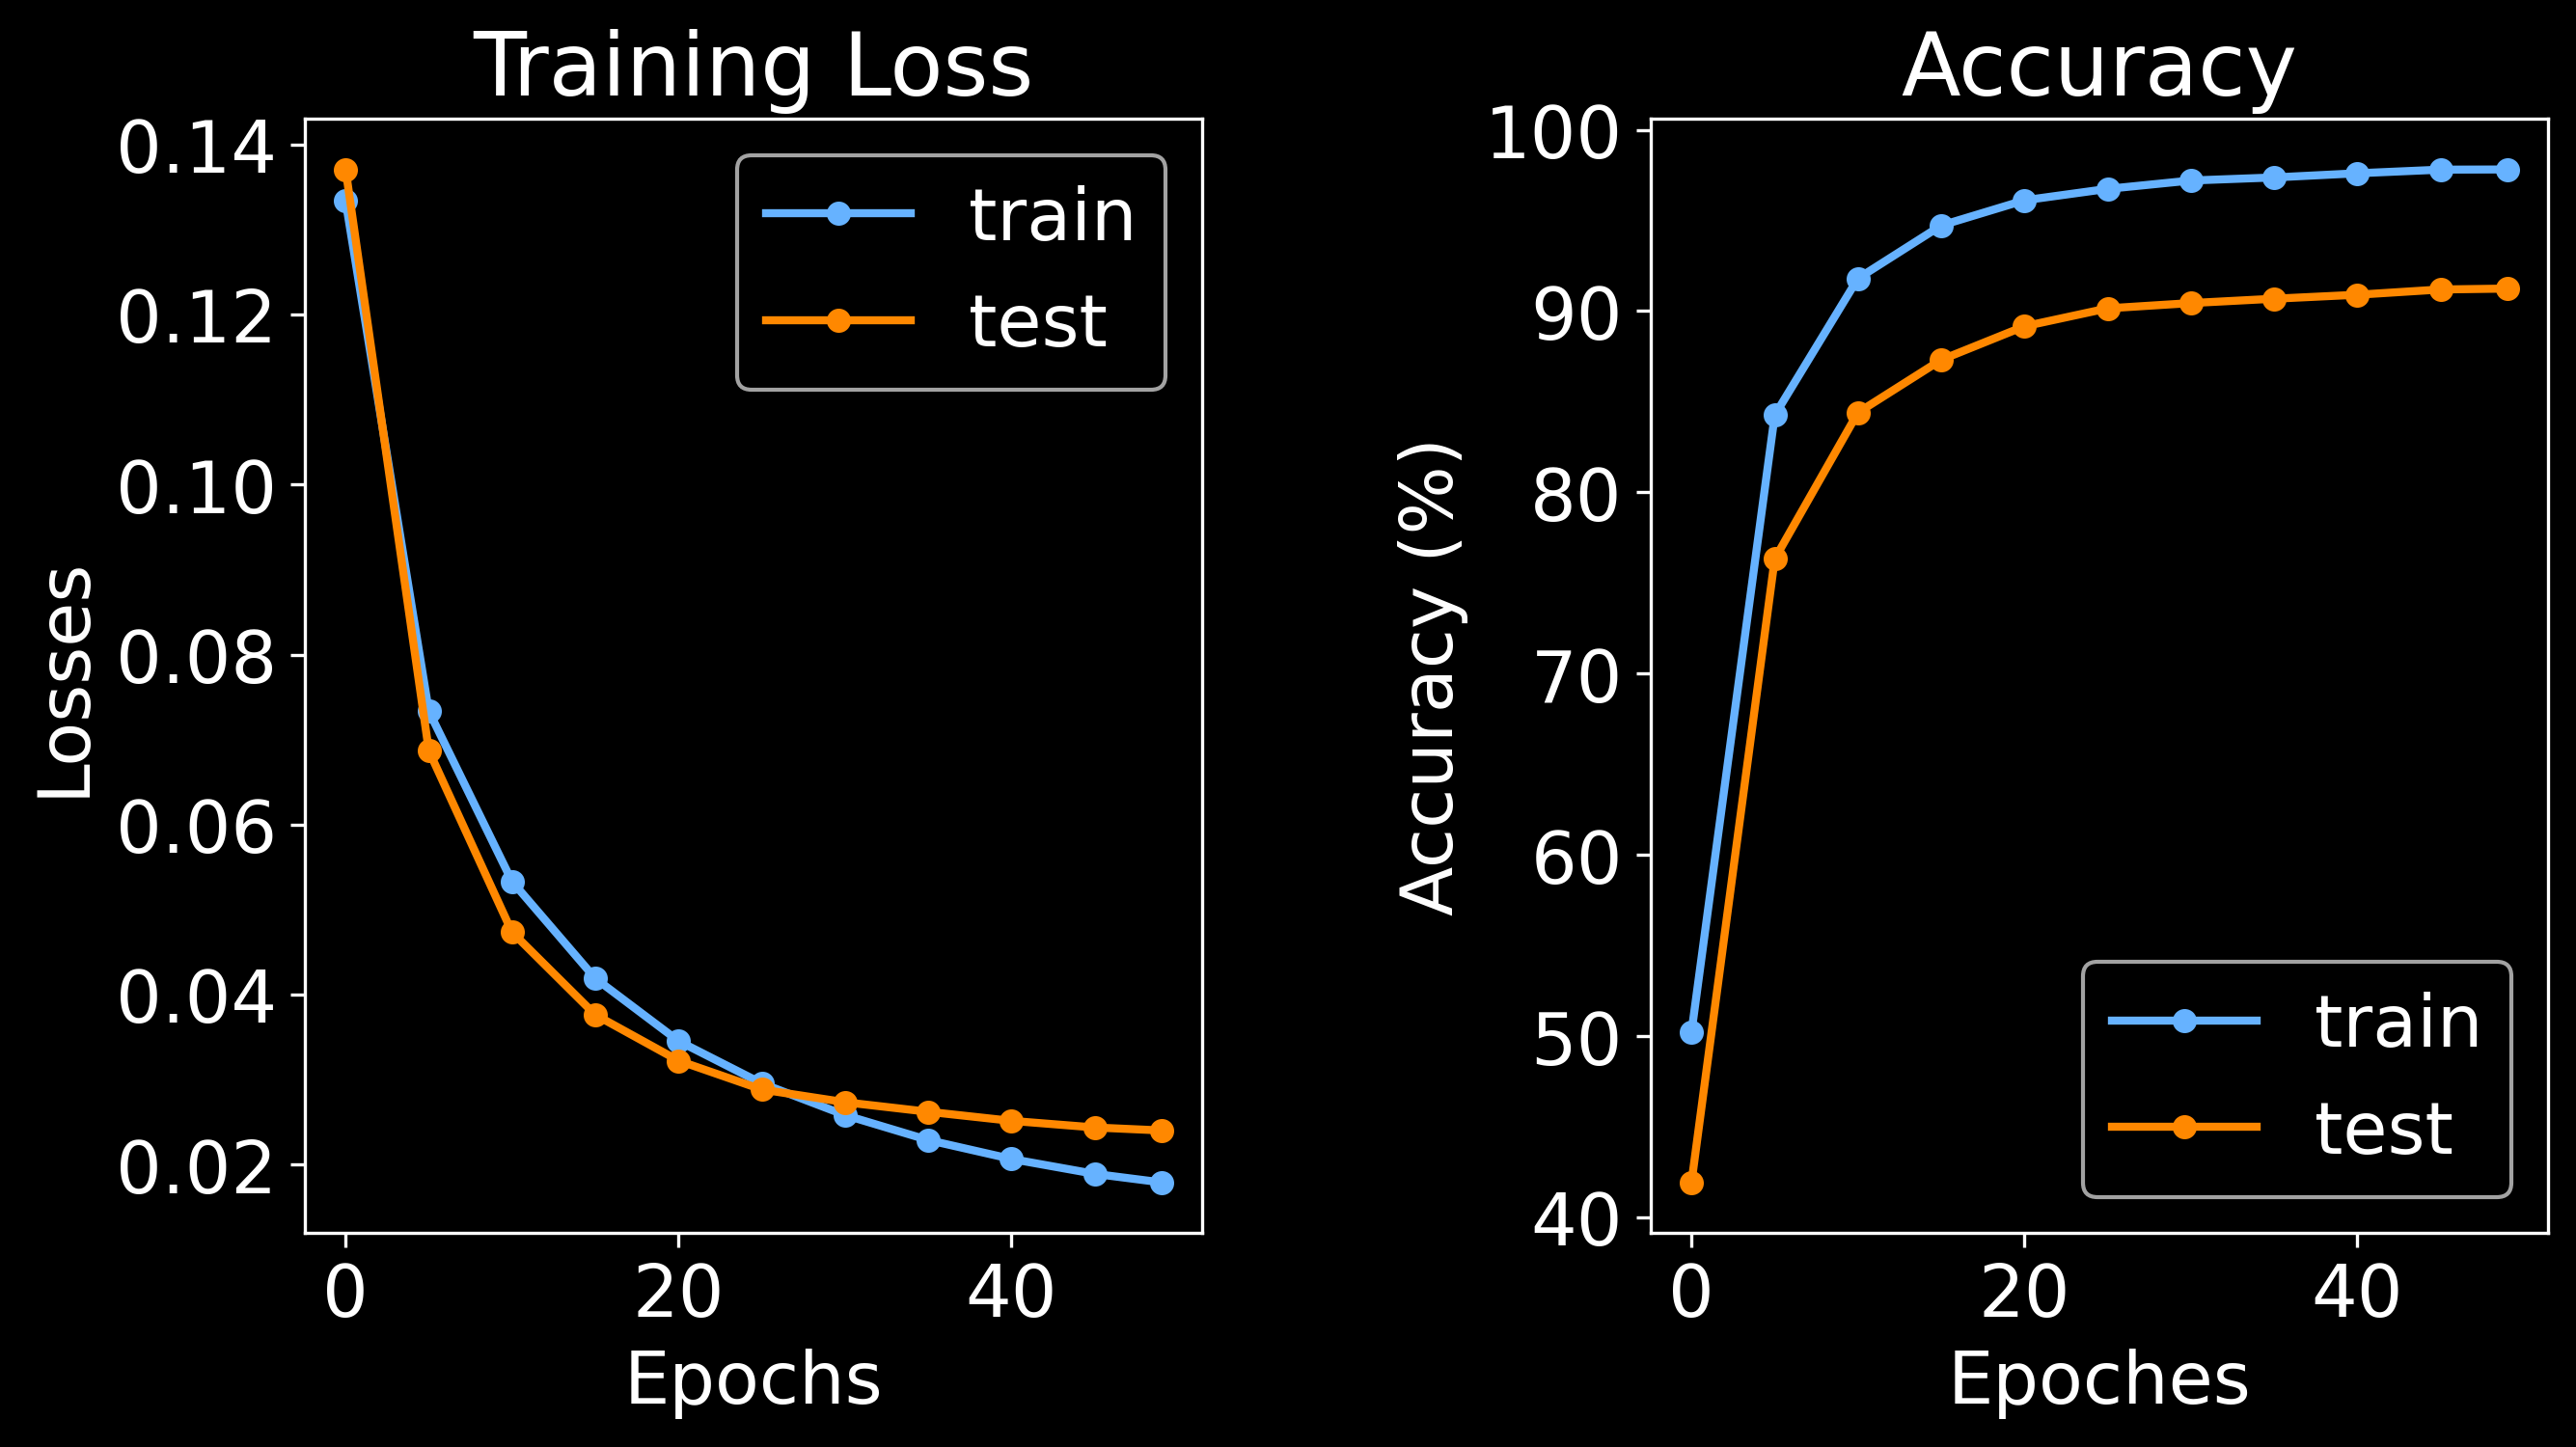

Training edge classifier:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [00:50<00:00,  1.04it/s]

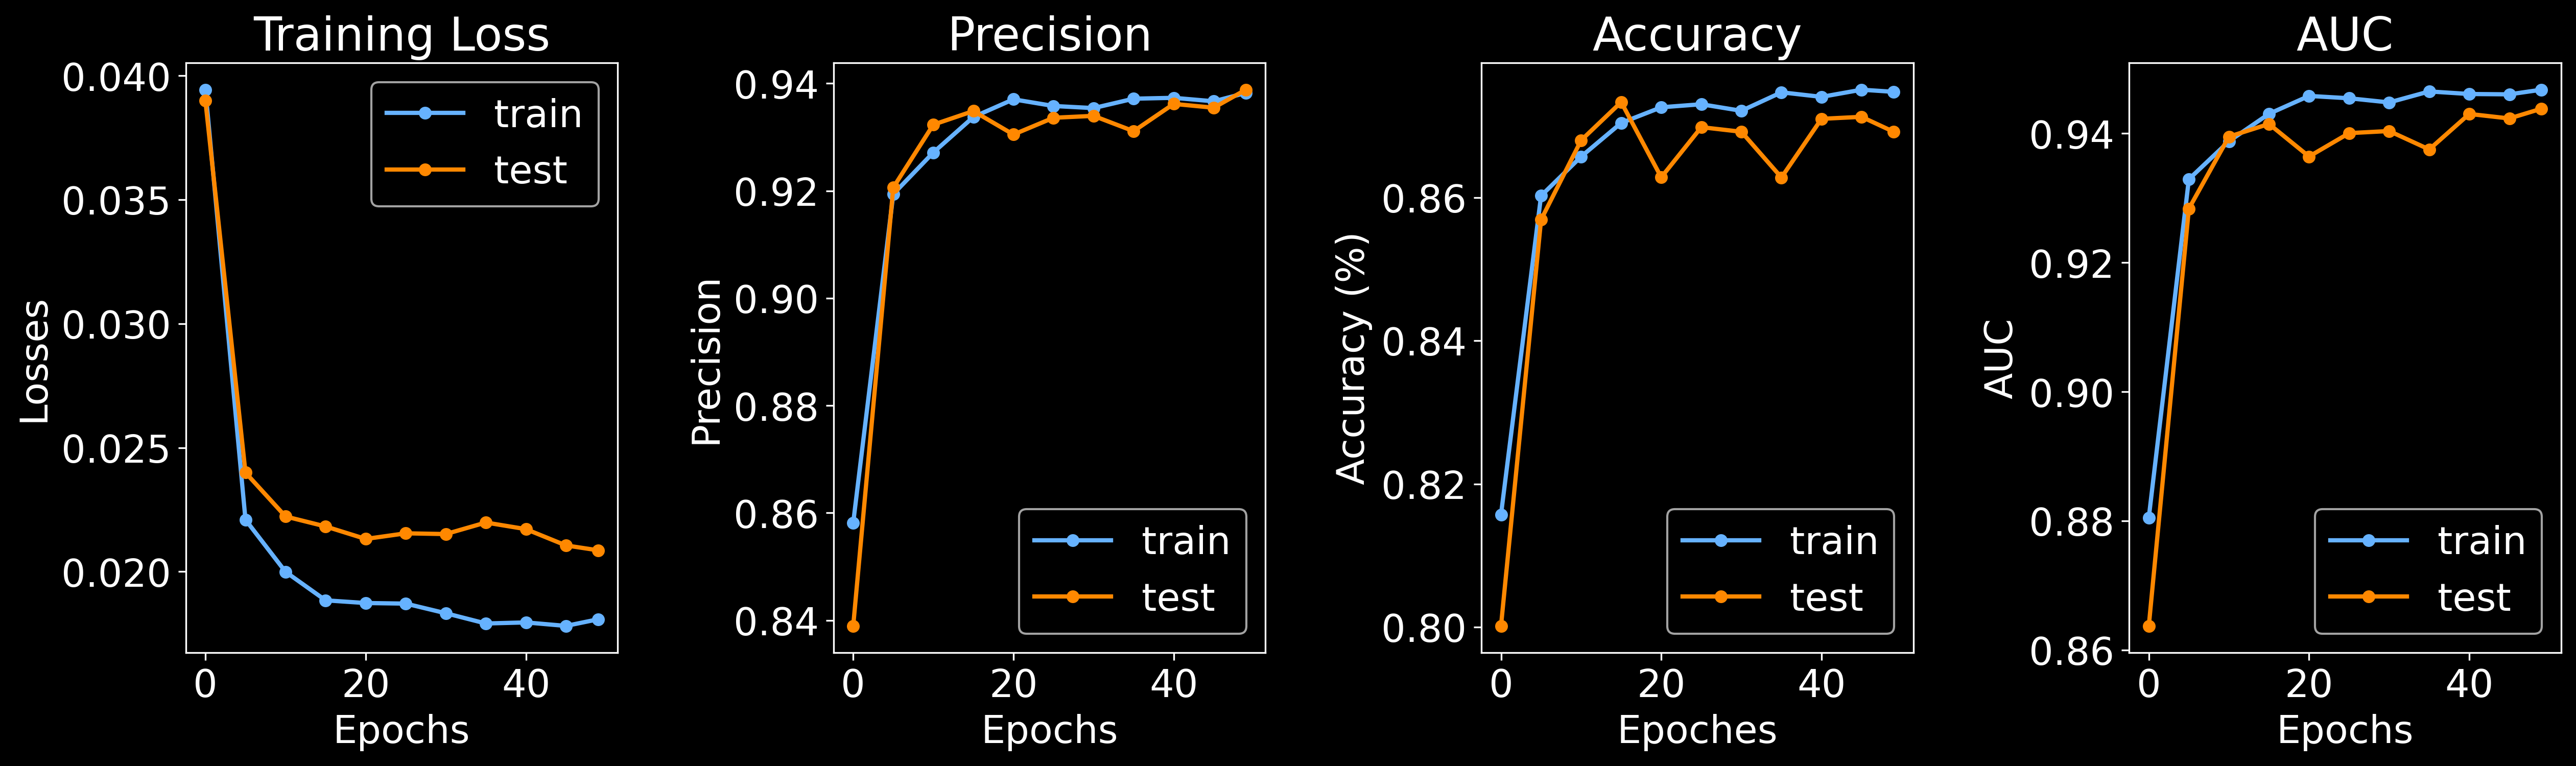

Training edge classifier: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:54<00:00,  1.09s/it]


In [9]:
br.train.Training(
    bg_sh,
    node_gcnq_hidden_dims = node_gcnq_hidden_dims,
    node_mlp_hidden_dims = node_mlp_hidden_dims,
    edge_rbf_start = 0,
    edge_rbf_stop = 128,
    edge_rbf_n_kernels = 64,
    node_epoches = 50, 
)

### Visualizing deep model

In [10]:
# randomly select a cell
random_cells = cells = random.sample(bg_dp.segmented.index.values.tolist(), 1)[:3] # 3 random cells

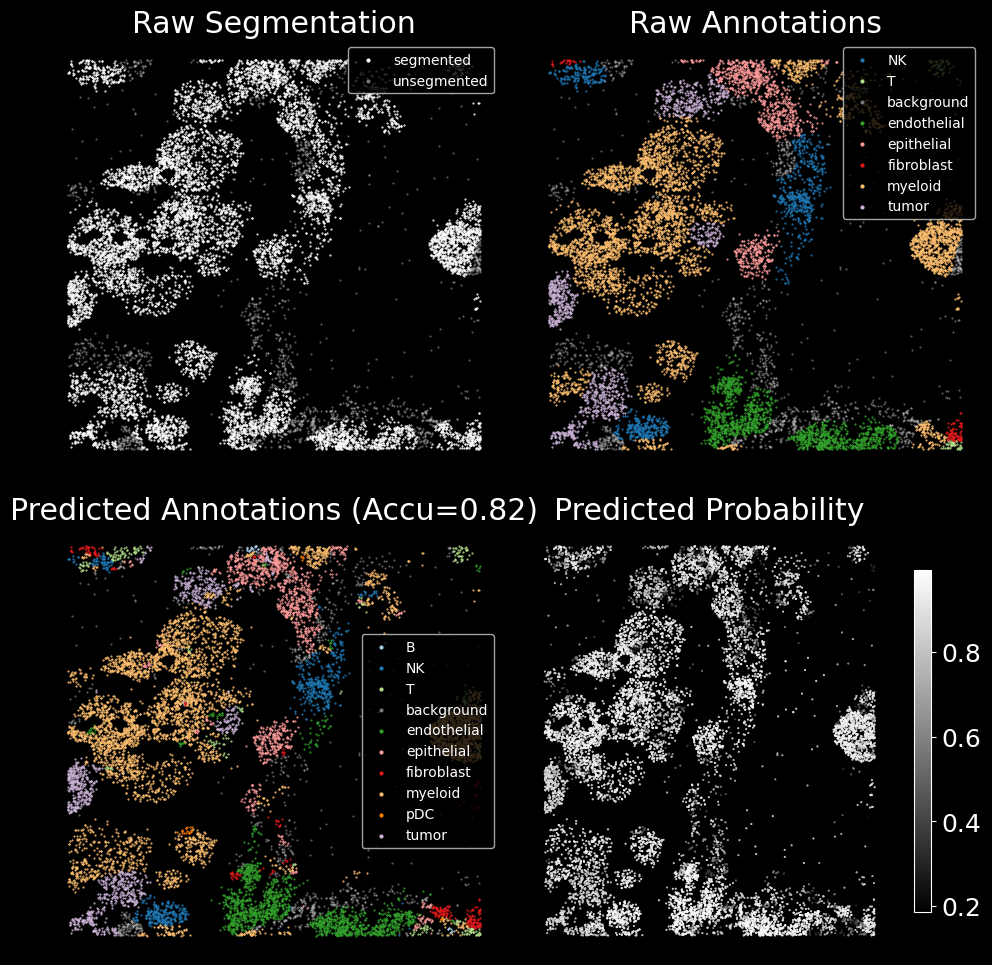

In [11]:
for random_cell in random_cells:
    _,_,_ = br.pl.Plot_Classification(
        bg_dp, 
        cell_name = random_cell,
        n_neighbors = 10, 
        zoomout_scale = 4,
    )

### Visualize shallow models

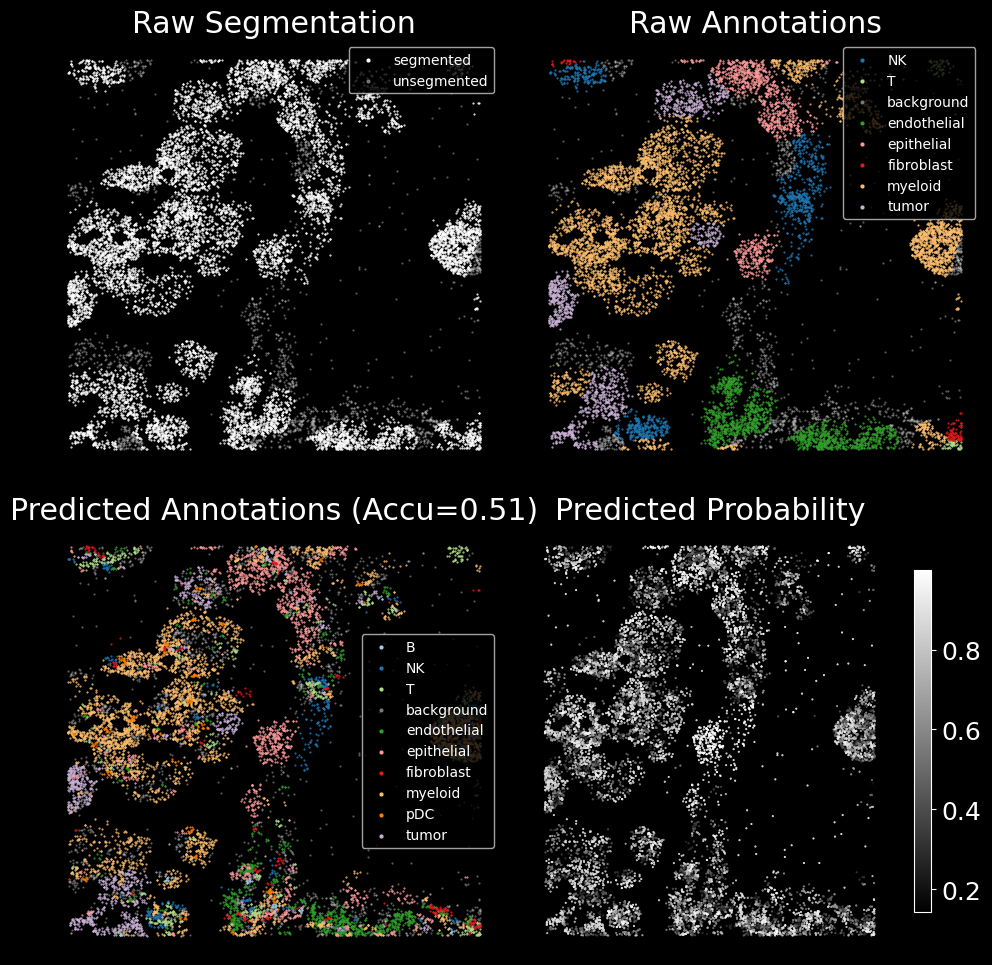

In [12]:
for random_cell in random_cells:
    _,_,_ = br.pl.Plot_Classification(
        bg_sh, 
        cell_name = random_cell,
        n_neighbors = 10, 
        zoomout_scale = 4,
    )